<a href="https://colab.research.google.com/github/Abhishek-9090/plant-disease-detector/blob/main/plant_leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras matplotlib scikit-learn


In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mishra29abhiiii","key":"ea850571e367a29a57f487d423dc3e70"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 98% 645M/658M [00:10<00:00, 64.4MB/s]
100% 658M/658M [00:11<00:00, 62.6MB/s]


In [ ]:
!unzip plantdisease.zip


Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [ ]:
import os
os.listdir()

['.config',
 'PlantVillage',
 'plantdisease.zip',
 'kaggle (1).json',
 'plantvillage',
 'sample_data']

In [ ]:
import os
os.listdir("PlantVillage")

['Potato___Late_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Late_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy',
 'Tomato_Septoria_leaf_spot',
 'Potato___Early_blight',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Spider_mites_Two_spotted_spider_mite']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
IMAGE_SIZE = (128, 128)  # Resize all images to 128x128
BATCH_SIZE = 32
DATA_DIR = "PlantVillage"

# ImageDataGenerator for train/validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Train data
train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data
val_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')  # 15 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.3790 - loss: 1.9251 - val_accuracy: 0.7310 - val_loss: 0.8164
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.7063 - loss: 0.8990 - val_accuracy: 0.7853 - val_loss: 0.6114
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.7698 - loss: 0.6802 - val_accuracy: 0.8265 - val_loss: 0.5206
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8036 - loss: 0.5749 - val_accuracy: 0.8802 - val_loss: 0.3460
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8411 - loss: 0.4493 - val_accuracy: 0.8920 - val_loss: 0.3381
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.8770 - loss: 0.3664 - val_accuracy: 0.9141 - val_loss: 0.2624
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8997 - loss: 0.3003 - val_accuracy: 0.9170 - val_loss: 0.2532
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.9099 - loss: 0.2697 - val_accurac

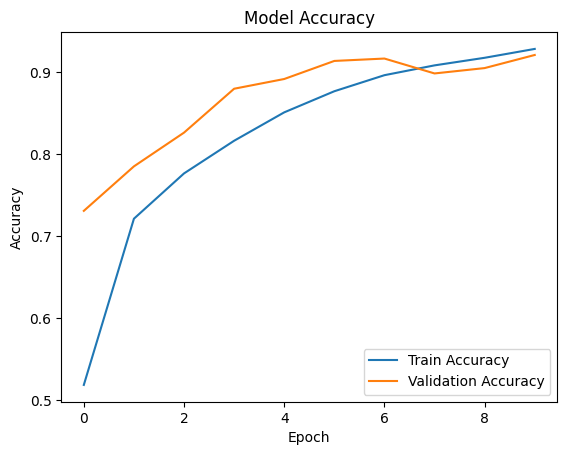

In [ ]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

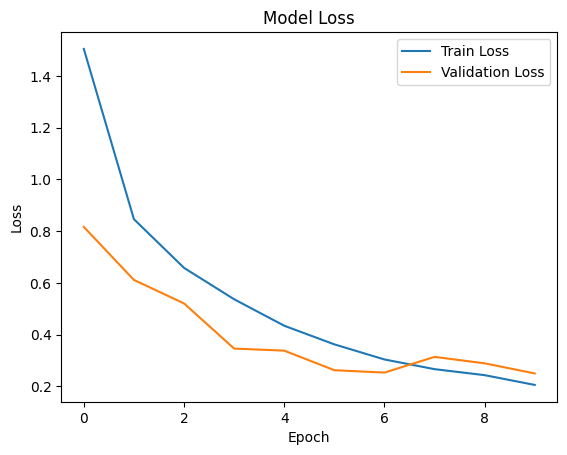

In [ ]:
# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving leaf.jpg to leaf.jpg


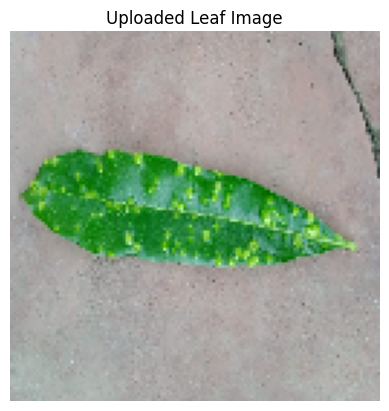

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Corn_healthy
Medicine info not available for this class.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img = image.load_img('leaf.jpg', target_size=(128, 128))  # make sure name is correct
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # model expects batch
img_array = img_array / 255.0  # normalize

import matplotlib.pyplot as plt

# Display the uploaded leaf image
plt.imshow(img_array[0])   # Assuming img_array is (1, 128, 128, 3)
plt.axis('off')
plt.title("Uploaded Leaf Image")
plt.show()



# Prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Class names (replace with your actual 15 class names)
class_names = ['Apple__Black_rot', 'Apple_healthy', 'Corn__Cercospora_leaf_spot',
               'Corn__Common_rust', 'Corn_healthy', 'Grape__Black_rot',
               'Grape__healthy', 'Peach_Bacterial_spot', 'Peach__healthy',
               'Pepper_bell_Bacterial_spot', 'Potato__Early_blight',
               'Potato__healthy', 'Tomato_Bacterial_spot', 'Tomato__Early_blight',
               'Tomato___healthy']

# Disease to Medicine Mapping
disease_to_medicine = {
    'Tomato___Bacterial_spot': 'Spray Copper-based fungicides',
    'Tomato___Early_blight': 'Use Mancozeb or Chlorothalonil',
    'Tomato___Late_blight': 'Apply Metalaxyl or Ridomil Gold',
    'Tomato___Leaf_Mold': 'Use Fungicide containing Chlorothalonil',
    'Tomato___Septoria_leaf_spot': 'Spray Neem oil or Fungicide',
    'Tomato___Spider_mites Two-spotted_spider_mite': 'Use Miticides like Abamectin',
    'Tomato___Target_Spot': 'Apply Copper fungicide or Mancozeb',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'No cure – remove infected plants',
    'Tomato___Tomato_mosaic_virus': 'Remove infected leaves and use resistant seeds',
    'Tomato___healthy': 'No medicine needed, the plant is healthy',
    'Potato___Early_blight': 'Use Mancozeb or Copper fungicide',
    'Potato___Late_blight': 'Apply Metalaxyl or use Ridomil Gold',
    'Potato___healthy': 'No medicine needed, the plant is healthy',
    'Pepper_bell__Bacterial_spot': 'Spray copper-based bactericides',
    'Pepper_bell__healthy': 'No medicine needed, the plant is healthy',
}

# Output

predicted_class = class_names[predicted_class_index]
print("Predicted class:", predicted_class)

# Recommend medicine
if predicted_class in disease_to_medicine:
    print("Recommended Medicine:", disease_to_medicine[predicted_class])
else:
    print("Medicine info not available for this class.")



In [ ]:
model.save('plant_disease_model.h5')

In [ ]:
from google.colab import files
files.download('plant_disease_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

None
